In [1]:
import pandas as pd
import os

RNA_PATH = "../../datasets/RNAseq"
RNA_JSON_PATH = "../../datasets/RNAseq(json&manifest)/files.2025-10-21.json"

In [2]:
# Check if all file in all sub folder od datasets/miRNA_seq terminate with mirnas.quantification.
subforder_count = 0
count_not_tsv = 0
count_tsv = 0
for subfolder in os.listdir(RNA_PATH):
    subforder_count += 1
    for file in os.listdir(f"{RNA_PATH}/{subfolder}"):
        if not file.endswith("augmented_star_gene_counts.tsv"):
            count_not_tsv+=1
            print(f"File {file} in folder {subfolder} does not end with augmented_star_gene_counts.tsv")
        else:
            count_tsv+=1
print(f"\nNumber of files not ending with mirnas.quantification.txt: {count_not_tsv}")
print(f"Count tsv file: {count_tsv}")
subforder_count

File annotations.txt in folder 068841a8-af6a-4925-bad0-586005f59521 does not end with augmented_star_gene_counts.tsv
File logs in folder 068841a8-af6a-4925-bad0-586005f59521 does not end with augmented_star_gene_counts.tsv
File annotations.txt in folder 0e1999e0-9c02-4804-88b6-60b46d100739 does not end with augmented_star_gene_counts.tsv
File logs in folder 0e1999e0-9c02-4804-88b6-60b46d100739 does not end with augmented_star_gene_counts.tsv
File annotations.txt in folder 385ddd6f-c126-4c4f-acde-1ef2d74d3639 does not end with augmented_star_gene_counts.tsv
File logs in folder 385ddd6f-c126-4c4f-acde-1ef2d74d3639 does not end with augmented_star_gene_counts.tsv
File annotations.txt in folder 3e8cff80-ed17-479c-8327-ca8e71ee7482 does not end with augmented_star_gene_counts.tsv
File logs in folder 3e8cff80-ed17-479c-8327-ca8e71ee7482 does not end with augmented_star_gene_counts.tsv
File annotations.txt in folder 45584684-6082-422f-abe5-ef918f8ee77a does not end with augmented_star_gene_co

787

We have **787** subfolders and all contain a file that ends with `augmented_star_gene_counts.tsv`.

## Analysis of a file TSV (tab-separated values)

In [18]:
df = pd.read_csv(f"{RNA_PATH}/0a74ea3f-dadc-4c9f-96ea-62a77c1e602c/4fa35f20-e26e-4bb0-811d-b307e3927904.rna_seq.augmented_star_gene_counts.tsv", sep="\t", comment="#")

df.head()

,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
0,N_unmapped,NaN,NaN,1961927,1961927,1961927,NaN,NaN,NaN
1,N_multimapping,NaN,NaN,4523899,4523899,4523899,NaN,NaN,NaN
2,N_noFeature,NaN,NaN,1806860,28155361,28076108,NaN,NaN,NaN
3,N_ambiguous,NaN,NaN,5809843,1435356,1439403,NaN,NaN,NaN
4,ENSG00000000003.15,TSPAN6,protein_coding,6278,3164,3115,90.3164,28.6817,32.0976


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60664 entries, 0 to 60663
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gene_id             60664 non-null  object 
 1   gene_name           60660 non-null  object 
 2   gene_type           60660 non-null  object 
 3   unstranded          60664 non-null  int64  
 4   stranded_first      60664 non-null  int64  
 5   stranded_second     60664 non-null  int64  
 6   tpm_unstranded      60660 non-null  float64
 7   fpkm_unstranded     60660 non-null  float64
 8   fpkm_uq_unstranded  60660 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 4.2+ MB


In [45]:
df.shape

(60664, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60664 entries, 0 to 60663
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gene_id             60664 non-null  object 
 1   gene_name           60660 non-null  object 
 2   gene_type           60660 non-null  object 
 3   unstranded          60664 non-null  int64  
 4   stranded_first      60664 non-null  int64  
 5   stranded_second     60664 non-null  int64  
 6   tpm_unstranded      60660 non-null  float64
 7   fpkm_unstranded     60660 non-null  float64
 8   fpkm_uq_unstranded  60660 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 4.2+ MB


The dataframe has **60499** rows and 9 columns: 
- **gene_id**: object
- **gene_name**: object
- **gene_type**: object
- **unstranded**: int64
- **stranded_first**: int64
- **stranded_second**: int64
- **tpm_unstranded**: float64
- **fpkm_unstranded**: float64
- **fpkm_uq_unstranded**: float64

In [46]:
df.describe()

,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
count,6.066400e+04,6.066400e+04,6.066400e+04,60660.000000,60660.000000,60660.000000
mean,1.056196e+03,1.056196e+03,1.056196e+03,16.485328,5.235227,5.858729
std,3.268194e+04,1.162638e+05,1.159473e+05,321.910603,102.228782,114.403962
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,1.000000e+00,0.000000e+00,1.000000e+00,0.026100,0.008300,0.009300
75%,4.600000e+01,5.300000e+01,5.300000e+01,1.442825,0.458200,0.512800
max,5.809843e+06,2.815536e+07,2.807611e+07,35063.194000,11134.978400,12461.125200


In [47]:
print(df['gene_type'].value_counts())

gene_type
protein_coding                        19962
lncRNA                                16901
processed_pseudogene                  10167
unprocessed_pseudogene                 2614
misc_RNA                               2212
snRNA                                  1901
miRNA                                  1881
TEC                                    1057
snoRNA                                  943
transcribed_unprocessed_pseudogene      939
transcribed_processed_pseudogene        500
rRNA_pseudogene                         497
IG_V_pseudogene                         187
IG_V_gene                               145
transcribed_unitary_pseudogene          138
TR_V_gene                               106
unitary_pseudogene                       98
TR_J_gene                                79
scaRNA                                   49
polymorphic_pseudogene                   48
rRNA                                     47
IG_D_gene                                37
TR_V_pseudogene       

| Gene Type                         |  Count |
|-----------------------------------|-------:|
| protein_coding                    | 19 962 |
| lncRNA                            | 16 901 |
| processed_pseudogene              | 10 167 |
| unprocessed_pseudogene            |  2 614 |
| misc_RNA                          |  2 212 |
| snRNA                             |  1 901 |
| miRNA                             |  1 881 |
| TEC                               |  1 057 |
| snoRNA                            |    943 |
| transcribed_unprocessed_pseudogene |    939 |
| transcribed_processed_pseudogene  |    500 |
| rRNA_pseudogene                   |    497 |
| IG_V_pseudogene                   |    187 |
| ...                               |    ... |


### Check gene_id not start with EN

In [10]:
# See gene_id that not start with EN
not_en_df = df[~df['gene_id'].str.startswith('EN')]
print(not_en_df['gene_id'])

0        N_unmapped
1    N_multimapping
2       N_noFeature
3       N_ambiguous
Name: gene_id, dtype: object


The only gene_id that does not start with EN are:

| gene_id        |
|----------------|
| N_unmapped     |
| N_multimapping |
| N_noFeature    |
| N_ambiguous    |

### Plot gene_type distribution

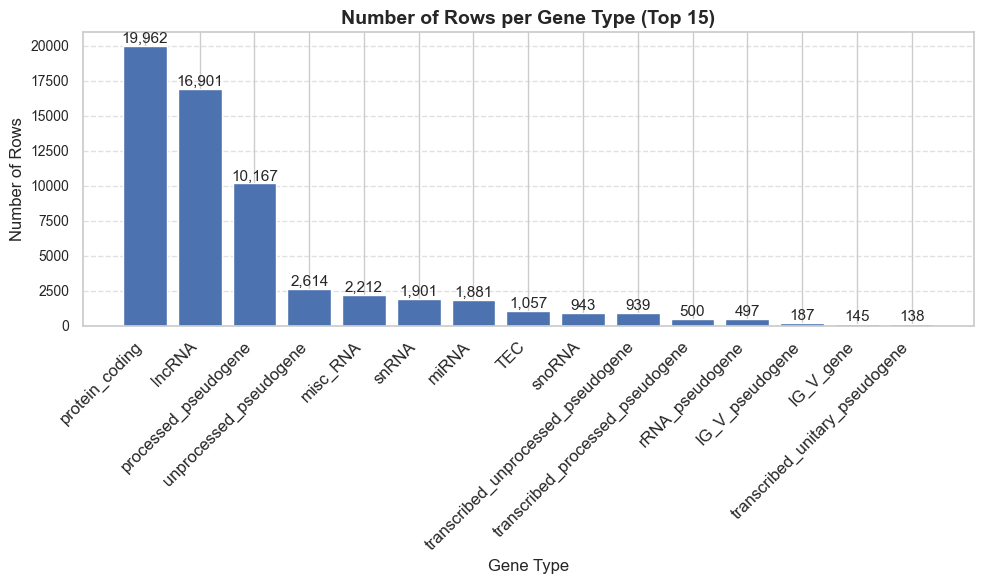

In [29]:
import matplotlib.pyplot as plt

# Count rows per gene_type
gene_type_counts = (
    df['gene_type']
    .value_counts()
    .sort_values(ascending=False)
    .head(15)
)

# Convert to DataFrame for plotting
gene_type_counts_df = (
    gene_type_counts
    .rename_axis('gene_type')
    .reset_index(name='row_count')
)

plt.figure(figsize=(10, 6))
bars = plt.bar(
    gene_type_counts_df['gene_type'],
    gene_type_counts_df['row_count'],
)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height):,}",  # formatted with commas
        ha='center', va='bottom',
        fontsize=11
    )

# Titles and labels
plt.title("Number of Rows per Gene Type (Top 15)", fontsize=14, fontweight='bold')
plt.xlabel("Gene Type", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)

# Improve X axis readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Load all cases

In [2]:
def import_txt(file_path):
    dtype_map = {
        "gene_id": "string",
        "gene_name": "string",
        "gene_type": "category",
        "unstranded": "Int64",
        "tpm_unstranded": "float64",
        "fpkm_unstranded": "float64"
    }
    usecols = ['gene_id', 'gene_name', 'gene_type', 'unstranded', 'tpm_unstranded', 'fpkm_unstranded']
    temp_df = pd.read_csv(file_path, sep="\t", comment="#", usecols=usecols, dtype=dtype_map)
    return temp_df.dropna(how="all")

def mRNA_process():
    all_dfs = []
    i = 0
    for subfolder in os.listdir(RNA_PATH):
        for file in os.listdir(f"{RNA_PATH}/{subfolder}"):
            if file.endswith("augmented_star_gene_counts.tsv"):
                print(f"{i} | Processing file: {RNA_PATH}/{subfolder}/{file}")
                i += 1
                selected_data = import_txt(f"{RNA_PATH}/{subfolder}/{file}")

                if selected_data is not None and not selected_data.empty:
                    selected_data.insert(0, "file_name", file)
                    all_dfs.append(selected_data)
    df = pd.concat(all_dfs, ignore_index=True)
    return df

mRNA_df = mRNA_process()
mRNA_df.shape

0 | Processing file: ../../datasets/RNAseq/0022cd20-f64f-4773-b9ff-a3de0b71b259/8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.augmented_star_gene_counts.tsv
1 | Processing file: ../../datasets/RNAseq/00469928-b243-4cae-acd7-134508e99ceb/2f51534b-248b-4999-bc3f-e42a2e98332e.rna_seq.augmented_star_gene_counts.tsv
2 | Processing file: ../../datasets/RNAseq/0094f9d0-45ec-4aad-bca0-71c60bdd7113/cafc9e36-c5f0-45df-ad03-16210ff0d870.rna_seq.augmented_star_gene_counts.tsv
3 | Processing file: ../../datasets/RNAseq/010e405c-b91d-4046-898e-105d5830d9a9/7135f14b-e84f-4ebf-8d95-b2a3c843fd4d.rna_seq.augmented_star_gene_counts.tsv
4 | Processing file: ../../datasets/RNAseq/017d71aa-0999-4d8e-9cb4-88b9013e61eb/c6683fc6-49f4-4e53-94ac-251799c2c638.rna_seq.augmented_star_gene_counts.tsv
5 | Processing file: ../../datasets/RNAseq/02e08315-4d34-421c-acc0-129b1e1de38b/4a88d54f-c88c-4ffd-84c9-069b53f2cb28.rna_seq.augmented_star_gene_counts.tsv
6 | Processing file: ../../datasets/RNAseq/03891509-3109-450d-85

(47742568, 7)

### Check for NaN values

In [8]:
mRNA_df.isna().sum()

folder_name           0
file_name             0
gene_id               0
gene_name          3148
gene_type          3148
unstranded            0
tpm_unstranded     3148
fpkm_unstranded    3148
dtype: int64

We have NaN values in:

| Column               | NaN Count |
|---------------------|----------:|
| gene_name           |     3148 |
| gene_type           |     3148 |
| tpm_unstranded      |     3148 |
| fpkm_unstranded     |     3148 |


In [9]:
mRNA_df[mRNA_df['gene_type'].isna()]

,folder_name,file_name,gene_id,gene_name,gene_type,unstranded,tpm_unstranded,fpkm_unstranded
0,0022cd20-f64f-4773-b9ff-a3de0b71b259,8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...,N_unmapped,<NA>,NaN,2966756,NaN,NaN
1,0022cd20-f64f-4773-b9ff-a3de0b71b259,8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...,N_multimapping,<NA>,NaN,5661979,NaN,NaN
2,0022cd20-f64f-4773-b9ff-a3de0b71b259,8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...,N_noFeature,<NA>,NaN,2732659,NaN,NaN
3,0022cd20-f64f-4773-b9ff-a3de0b71b259,8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...,N_ambiguous,<NA>,NaN,6632248,NaN,NaN
60664,00469928-b243-4cae-acd7-134508e99ceb,2f51534b-248b-4999-bc3f-e42a2e98332e.rna_seq.a...,N_unmapped,<NA>,NaN,2975718,NaN,NaN
...,...,...,...,...,...,...,...,...
47621243,ff5f8ada-17c5-497e-9182-63a05e3ab4c5,64b12ba7-a481-4fdb-9c74-38c94c7ef3c9.rna_seq.a...,N_ambiguous,<NA>,NaN,4874803,NaN,NaN
47681904,ffeede9a-d9a9-4836-8c56-39f12a5fde0e,74179e5e-2d3c-417e-8844-6740ea9fb2e5.rna_seq.a...,N_unmapped,<NA>,NaN,5092416,NaN,NaN
47681905,ffeede9a-d9a9-4836-8c56-39f12a5fde0e,74179e5e-2d3c-417e-8844-6740ea9fb2e5.rna_seq.a...,N_multimapping,<NA>,NaN,5816833,NaN,NaN
47681906,ffeede9a-d9a9-4836-8c56-39f12a5fde0e,74179e5e-2d3c-417e-8844-6740ea9fb2e5.rna_seq.a...,N_noFeature,<NA>,NaN,3319149,NaN,NaN


In [12]:
# Count how many gene_id are N_unmapped, N_multimapping, N_noFeature, N_ambiguous
mRNA_df['gene_id'].value_counts().loc[['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous']]

gene_id
N_unmapped        787
N_multimapping    787
N_noFeature       787
N_ambiguous       787
Name: count, dtype: Int64

We have the following counts for these gene_id:

| gene_id        | Count  |
|----------------|-------:|
| N_unmapped     |  787 |
| N_multimapping |  787 |
| N_noFeature    |  787 |
| N_ambiguous    |  787 |


787 * 4 = 3148, which matches the NaN counts above.

### Remove rows with gene_id in N_unmapped, N_multimapping, N_noFeature, N_ambiguous

In [3]:
mRNA_df = mRNA_df[~mRNA_df['gene_id'].isin(['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous'])]#.reset_index(drop=True)
mRNA_df.isna().sum()

file_name          0
gene_id            0
gene_name          0
gene_type          0
unstranded         0
tpm_unstranded     0
fpkm_unstranded    0
dtype: int64

Removing 'N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous' rows, we eliminate all **NaN values**.

In [13]:
# Show value counts of gene_type
mRNA_df['gene_type'].value_counts()

gene_type
protein_coding                        15710094
lncRNA                                13301087
processed_pseudogene                   8001429
unprocessed_pseudogene                 2057218
misc_RNA                               1740844
snRNA                                  1496087
miRNA                                  1480347
TEC                                     831859
snoRNA                                  742141
transcribed_unprocessed_pseudogene      738993
transcribed_processed_pseudogene        393500
rRNA_pseudogene                         391139
IG_V_pseudogene                         147169
IG_V_gene                               114115
transcribed_unitary_pseudogene          108606
TR_V_gene                                83422
unitary_pseudogene                       77126
TR_J_gene                                62173
scaRNA                                   38563
polymorphic_pseudogene                   37776
rRNA                                     36989
IG_

### Plot unstranded, tpm_unstranded, fpkm_unstranded distribution

In [12]:
print(mRNA_df.head(2))

                                           file_name             gene_id  \
0  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000003.15   
1  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...   ENSG00000000005.6   

  gene_name       gene_type  unstranded  tpm_unstranded  fpkm_unstranded  
0    TSPAN6  protein_coding        2443          28.535           8.0216  
1      TNMD  protein_coding         144           5.169           1.4531  


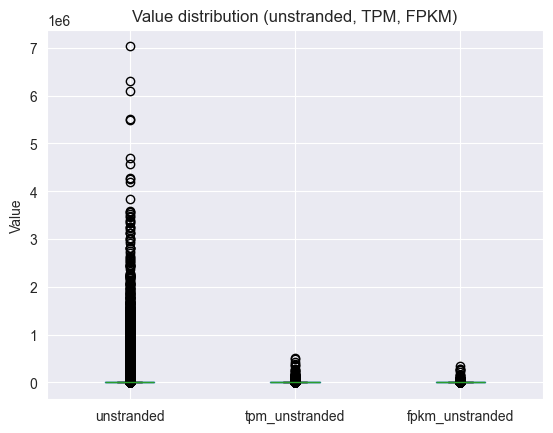

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = mRNA_df[["unstranded", "tpm_unstranded", "fpkm_unstranded"]].boxplot()

plt.title("Value distribution (unstranded, TPM, FPKM)")
plt.ylabel("Value")
plt.xticks(rotation=0)

# Formatta i numeri con separatore migliaia (es. 1,000 → 1 000)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", " ")))

plt.show()

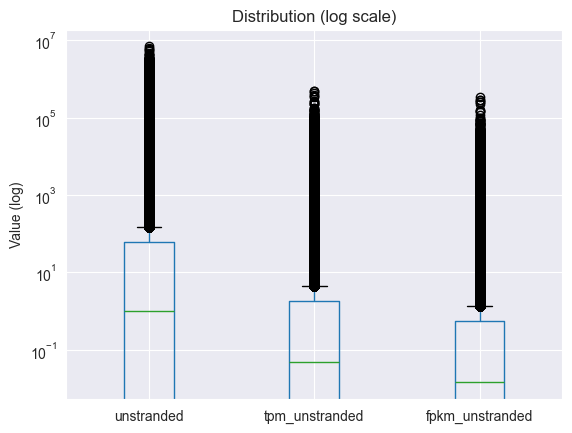

In [6]:
mRNA_df[["unstranded", "tpm_unstranded", "fpkm_unstranded"]].boxplot()
plt.yscale('log')
plt.title("Distribution (log scale)")
plt.ylabel("Value (log)")
plt.show()

## Filter protein_coding genes

In [4]:
protein_coding_df = mRNA_df[mRNA_df['gene_type'] == 'protein_coding'].reset_index(drop=True)
protein_coding_df.shape

(15710094, 7)

In [54]:
protein_coding_df.head()

                            folder_name  \
0  0022cd20-f64f-4773-b9ff-a3de0b71b259   
1  0022cd20-f64f-4773-b9ff-a3de0b71b259   
2  0022cd20-f64f-4773-b9ff-a3de0b71b259   
3  0022cd20-f64f-4773-b9ff-a3de0b71b259   
4  0022cd20-f64f-4773-b9ff-a3de0b71b259   
5  0022cd20-f64f-4773-b9ff-a3de0b71b259   
6  0022cd20-f64f-4773-b9ff-a3de0b71b259   
7  0022cd20-f64f-4773-b9ff-a3de0b71b259   
8  0022cd20-f64f-4773-b9ff-a3de0b71b259   
9  0022cd20-f64f-4773-b9ff-a3de0b71b259   

                                           file_name             gene_id  \
0  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000003.15   
1  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...   ENSG00000000005.6   
2  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000419.13   
3  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000457.14   
4  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000460.17   
5  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000938.

### Plot distribution for protein_coding genes

In [ ]:
import seaborn as sns

sns.pairplot(protein_coding_df[["unstranded", "tpm_unstranded", "fpkm_unstranded"]])
plt.show()

| Statistica | unstranded | tpm_unstranded | fpkm_unstranded |
|:------------|------------:|---------------:|----------------:|
| mean | 2,851.44 | 44.95 | 13.54 |
| std  | 14,757.20 | 466.70 | 160.17 |
| min  | 0.00 | 0.00 | 0.00 |
| 25%  | 13.00 | 0.24 | 0.07 |
| 50%  | 532.00 | 6.27 | 1.91 |
| 75%  | 2,391.00 | 27.03 | 8.05 |
| max  | 7,032,374.00 | 273,959.89 | 96,576.95 |


In [14]:
protein_coding_df.describe()

,unstranded,tpm_unstranded,fpkm_unstranded
count,15710094.0,1.571009e+07,1.571009e+07
mean,2851.438817,4.495244e+01,1.353500e+01
std,14757.19516,4.666965e+02,1.601676e+02
min,0.0,0.000000e+00,0.000000e+00
25%,13.0,2.353000e-01,7.110000e-02
50%,532.0,6.266700e+00,1.912800e+00
75%,2391.0,2.702660e+01,8.047100e+00
max,7032374.0,2.739599e+05,9.657695e+04


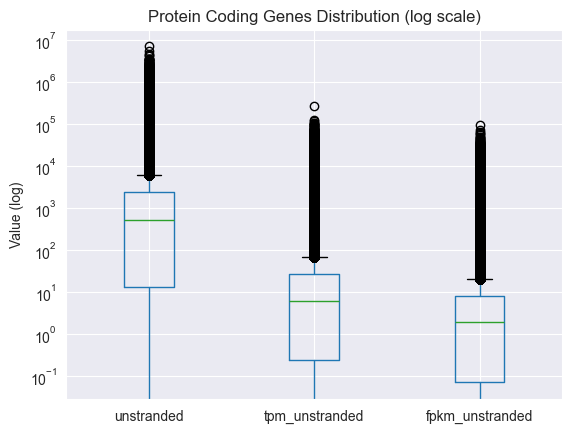

In [13]:
import matplotlib.pyplot as plt

protein_coding_df[["unstranded", "tpm_unstranded", "fpkm_unstranded"]].boxplot()
plt.yscale('log')
plt.title("Protein Coding Genes Distribution (log scale)")
plt.ylabel("Value (log)")
plt.show()

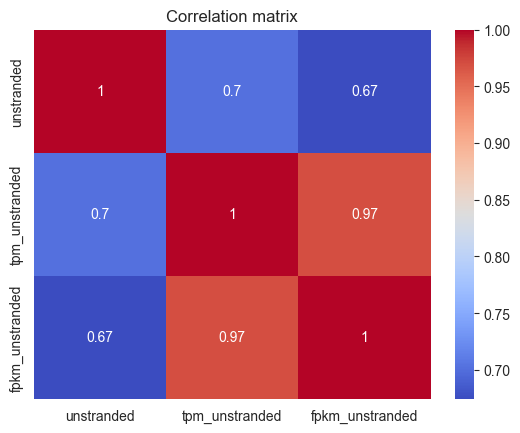

In [19]:
import seaborn as sns
corr = protein_coding_df[["unstranded", "tpm_unstranded", "fpkm_unstranded"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

### Aggregating mRNA data by file_name

In [14]:
aggr_mRNA_df = mRNA_df.groupby( ['file_name']).agg({
    'gene_id': list,
    'gene_name': list,
    'gene_type': list,
    'unstranded': list,
    'tpm_unstranded': list,
    'fpkm_unstranded': list
}).reset_index()

aggr_mRNA_df.shape

(787, 8)

In [58]:
aggr_mRNA_df['list_length'] = aggr_mRNA_df['fpkm_unstranded'].apply(len)
print(aggr_mRNA_df['list_length'].to_list())

[19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962, 19962

In [59]:
aggr_mRNA_df.head(1)

,folder_name,file_name,gene_id,gene_name,fpkm_unstranded,fpkm_uq_unstranded,list_length
0,0022cd20-f64f-4773-b9ff-a3de0b71b259,8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...,"[ENSG00000000003.15, ENSG00000000005.6, ENSG00...","[TSPAN6, TNMD, DPM1, SCYL3, C1orf112, FGR, CFH...","[8.0216, 1.4531, 28.6527, 3.1723, 1.0204, 5.19...","[8.9207, 1.6159, 31.8642, 3.5278, 1.1347, 5.77...",19962


In [60]:
aggr_mRNA_df.drop(columns=['list_length'], inplace=True)

# mRNA JSON

In [61]:
df_RNA_json = pd.read_json(RNA_JSON_PATH)
print(df_RNA_json.columns)

Index(['data_format', 'cases', 'access', 'file_name', 'file_id', 'data_type',
       'data_category', 'experimental_strategy', 'platform', 'file_size',
       'annotations'],
      dtype='object')


In [62]:
df_RNA_json.shape

(787, 11)

In [63]:
print(df_RNA_json[['cases', 'file_name']].shape)
df_RNA_json[['cases', 'file_name']].head(1)

(787, 2)


,cases,file_name
0,[{'case_id': 'a76774fe-7298-4d68-a2b2-c1bad93f...,2e64abe2-6024-4d28-9e09-560ce2a9fd15.rna_seq.a...


In [64]:
cases_expanded = df_RNA_json['cases'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else {})
unique_projects = pd.json_normalize(cases_expanded)['project.project_id'].unique()

print("Unique project IDs:", unique_projects)

Unique project IDs: ['TCGA-BRCA']


In [65]:
df_RNA_json['case_id'] = df_RNA_json['cases'].apply(
    lambda x: x[0]['case_id'] if isinstance(x, list) and len(x) > 0 and 'case_id' in x[0] else None
)

print(df_RNA_json[['case_id', 'file_name']].head())

                                case_id  \
0  a76774fe-7298-4d68-a2b2-c1bad93f0c31   
1  f3ba71f9-25f3-4784-bf2d-3aa522a0cba8   
2  4dfc233b-ed03-4825-8089-e04cdee99996   
3  2fe854b4-bac9-4801-9a1c-ee99388e8082   
4  30047d32-0833-4aca-98d1-3b9ab7122863   

                                           file_name  
0  2e64abe2-6024-4d28-9e09-560ce2a9fd15.rna_seq.a...  
1  1d468785-141d-40ca-acb1-d6d85a8c9d7b.rna_seq.a...  
2  748e4eaa-2b96-4dce-a903-c7df733d7f50.rna_seq.a...  
3  e614fbb4-7574-4704-9525-c0aea4c10fc6.rna_seq.a...  
4  ad8c55ae-46df-43cd-8cb5-c049e3019959.rna_seq.a...  


# Merge mRNA with mRNA JSON on file_name

In [66]:
miRNA_merged_df = pd.merge(protein_coding_df, df_RNA_json[['case_id', 'file_name']], on='file_name', how='inner')
miRNA_merged_df.head()

,folder_name,file_name,gene_id,gene_name,gene_type,fpkm_unstranded,fpkm_uq_unstranded,case_id
0,0022cd20-f64f-4773-b9ff-a3de0b71b259,8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...,ENSG00000000003.15,TSPAN6,protein_coding,8.0216,8.9207,c2a742fe-3e8b-4210-85a6-7191a1123609
1,0022cd20-f64f-4773-b9ff-a3de0b71b259,8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...,ENSG00000000005.6,TNMD,protein_coding,1.4531,1.6159,c2a742fe-3e8b-4210-85a6-7191a1123609
2,0022cd20-f64f-4773-b9ff-a3de0b71b259,8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...,ENSG00000000419.13,DPM1,protein_coding,28.6527,31.8642,c2a742fe-3e8b-4210-85a6-7191a1123609
3,0022cd20-f64f-4773-b9ff-a3de0b71b259,8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...,ENSG00000000457.14,SCYL3,protein_coding,3.1723,3.5278,c2a742fe-3e8b-4210-85a6-7191a1123609
4,0022cd20-f64f-4773-b9ff-a3de0b71b259,8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...,ENSG00000000460.17,C1orf112,protein_coding,1.0204,1.1347,c2a742fe-3e8b-4210-85a6-7191a1123609
